<a href="https://colab.research.google.com/github/belke05/churn_prediction_project/blob/master/churn_prediction_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

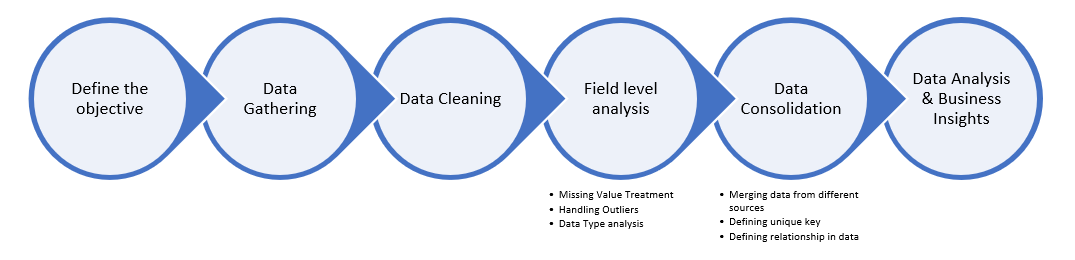[img link](https://)

*  objective is to find out if they will churn or not 
*  data already there
*  data cleaning no null values just making categorical values useful and normalizing

In [0]:
import pandas as pd, numpy as np, seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
churn_data  = pd.read_csv('/content/conversion_data.csv')

<h1>1. general information on data </h1>

In [0]:
churn_data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [0]:
print ("Rows     : " ,churn_data.shape[0])
print ("Columns  : " ,churn_data.shape[1])
print ("\nFeatures : \n" ,churn_data.columns.tolist())
print ("\nMissing values :  ", churn_data.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_data.nunique())

Rows     :  316200
Columns  :  6

Features : 
 ['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']

Missing values :   0

Unique values :  
 country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64


In [0]:
numerical_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'new_user', 'source']
target ="converted"

<h1>2. Exploring the data</h1>

possible questions:
*  does churn differ by country?
*  impact of age on conversion?
*  impact of visited pages on conversion?
*  is one source more effective than another?



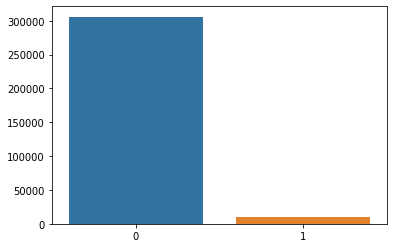

In [0]:
y = churn_data["converted"].value_counts()
sns.barplot(y.index,y.values)

In [0]:
print('we have a conversion rate of {}'.format((y[1]/np.sum(y.values)*100)))

we have a conversion rate of 3.225806451612903


<h3>A. find out the distribution of the numerical categories</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea68db2080>,
      dtype=object)

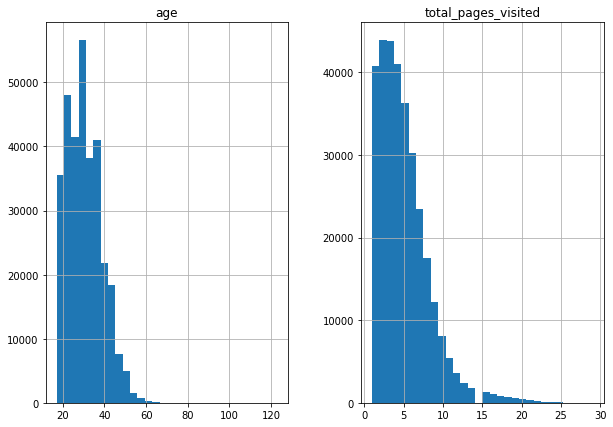

In [0]:
churn_data[numerical_features].hist(bins=30, figsize=(10, 7))

<h3>B. is there a relation between age and churn?</h3>

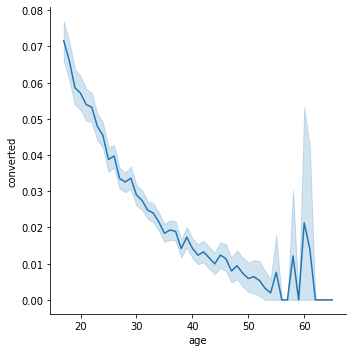

In [0]:
sns.relplot(x="age", y="converted", kind="line", data=churn_data[churn_data.age < 66])

we see a clear linear relationship: we can try to split the ages in groups to avoid overfitting 

In [0]:
def group_age(x):
  if x < 25:
    return 0
  elif x >= 25 and x < 30:
    return 1
  elif x >= 30 and x < 40:
    return 2
  elif x >= 40 and x < 50:
    return 3
  else:
    return 4
churn_data["age_groups"] = churn_data.age.apply(lambda x: group_age(x))

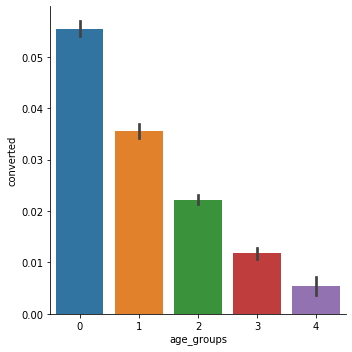

In [0]:
s = sns.catplot(x="age_groups", y="converted", data=churn_data, kind="bar")
cats_ages = churn_data.groupby("age_groups").count()
def plot_conversion_per_group(df, groupedby, sorton):
  newdf = pd.DataFrame(df[[groupedby,sorton]].groupby(groupedby).first())
  newdf = newdf.sort_values(sorton)
  sns.catplot(x=sorton, y=groupedby, kind="bar", data=newdf)



<h3>C. relationship with page visits</h3>

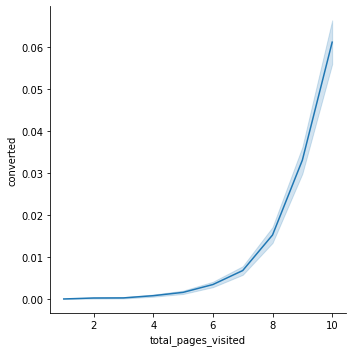

In [0]:
sns.relplot(x="total_pages_visited", y="converted", kind="line", data=churn_data[churn_data.total_pages_visited < 11])
# a = sns.regplot(x="total_pages_visited", y="converted", data=churn_data, logistic=True)
# almost perfect logistic regression relationship

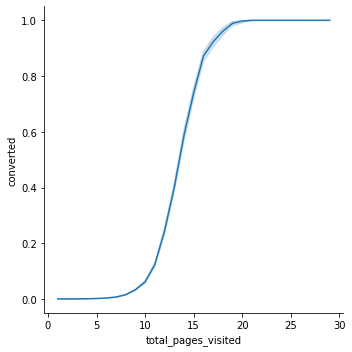

In [0]:
sns.relplot(x="total_pages_visited", y="converted", kind="line", data=churn_data)

we see a perfect logistic regression -- logistic regression is probably a good idea 

<h3>D. influence of country source and being new user on conversion</h3>

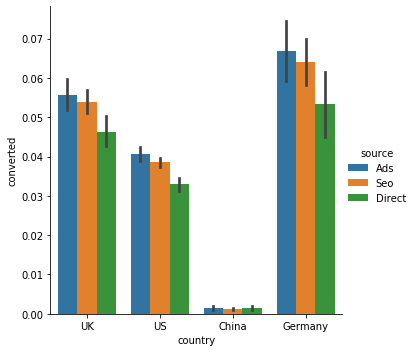

In [0]:
sns.catplot(data=churn_data, x="country", y="converted", kind="bar", hue="source")

in china we see a way lower conversion does this have an underlying reason?
*  different age distribution? 
*  different sources?
*  different page visits? 
*  more old users? 

age distribution is more or less the same in each country


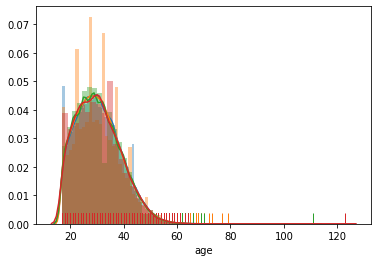

In [0]:
sns.distplot(churn_data[churn_data.country=="China"].age, hist=True, rug=True, label="china")
sns.distplot(churn_data[churn_data.country=="US"].age, hist=True, rug=True, label="us")
sns.distplot(churn_data[churn_data.country=="UK"].age, hist=True, rug=True ,label="uk")
sns.distplot(churn_data[churn_data.country=="Germany"].age, hist=True, rug=True ,label="germany")
print("age distribution is more or less the same in each country")

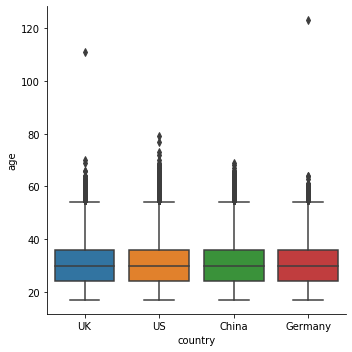

In [0]:
sns.catplot(x="country", y="age",
            kind="box", dodge=False, data=churn_data);

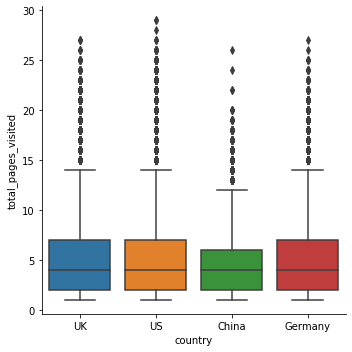

In [0]:
sns.catplot(x="country", y="total_pages_visited",
            kind="box", dodge=False, data=churn_data);

In [0]:
import matplotlib.pyplot as plt


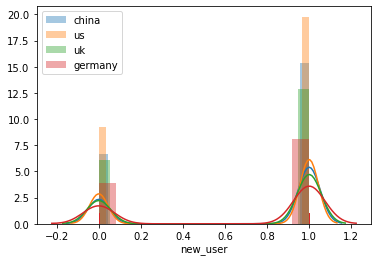

In [0]:
sns.distplot(churn_data[churn_data.country=="China"].new_user, hist=True, rug=True, label="china")
sns.distplot(churn_data[churn_data.country=="US"].new_user, hist=True, rug=True, label="us")
sns.distplot(churn_data[churn_data.country=="UK"].new_user, hist=True, rug=True ,label="uk")
sns.distplot(churn_data[churn_data.country=="Germany"].new_user, hist=True, rug=True ,label="germany")
plt.legend()

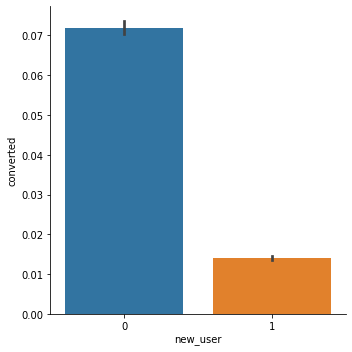

In [0]:
sns.catplot(data=churn_data, x="new_user", y="converted", kind="bar")

relative more new users which convert less but does not justify big difference

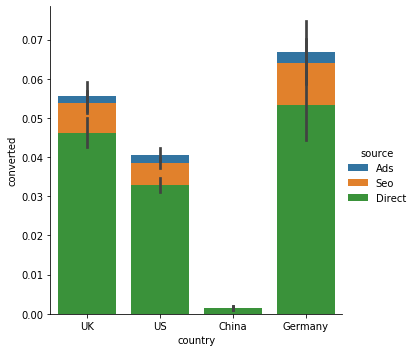

In [0]:
sns.catplot(x="country", y="converted", hue="source", dodge=False, data=churn_data, kind="bar");

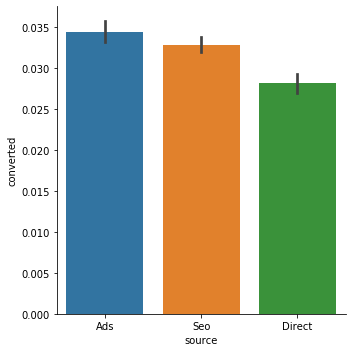

In [0]:
sns.catplot(x="source", y="converted", dodge=False, data=churn_data, kind="bar");

chinese come from direct which means slightly less succes in conversion

*  seems like ads work best for churn and germany is the company with most churn 
*  china has a very low churn rate next to this 
*  on first site a custome would be a first visiter from germany coming in via adsand with a low age

<h1>2. Generalizing and scaling the variables</h1>

In [0]:
y_target = [target]
features = categorical_features + [ 'age_groups', 'total_pages_visited',]

In [0]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [0]:
y = churn_data[y_target].values
x = churn_data[features].values

In [0]:
x

array([['UK', 1, 'Ads', 1, 1],
       ['US', 1, 'Seo', 0, 5],
       ['US', 1, 'Seo', 1, 4],
       ...,
       ['China', 0, 'Ads', 1, 4],
       ['US', 0, 'Seo', 0, 4],
       ['UK', 0, 'Ads', 0, 4]], dtype=object)

In [0]:
country_ohe = OneHotEncoder(drop='first')
source_ohe = OneHotEncoder(drop='first')

In [0]:
country_encoded = country_ohe.fit_transform(x[:,0].reshape(-1,1)).toarray()
# china is ref first one is ger then uk then us 

In [0]:
source_encoded = source_ohe.fit_transform(x[:,2].reshape(-1,1)).toarray()
# ads is the ref first one is direct then seo

In [0]:
X = np.append(x, source_encoded , axis=1)
X = np.append(country_encoded, X , axis=1)

In [0]:
labels = ['isGer', 'isUK', 'isUS', 'del1', 'isNew', 'del2', 'age_group', 'total_pages_visited','isDirect', 'isSeo']

In [0]:
X[1]

array([0.0, 0.0, 1.0, 'US', 1, 'Seo', 0, 5, 0.0, 1.0], dtype=object)

In [0]:
encoded_df = pd.DataFrame(data=X, columns=labels)
encoded_df = encoded_df.drop(columns=['del1','del2'])

In [0]:
encoded_df.head()

,isGer,isUK,isUS,isNew,age_group,total_pages_visited,isDirect,isSeo
0,0,1,0,1,1,1,0,0
1,0,0,1,1,0,5,0,1
2,0,0,1,1,1,4,0,1
3,0,0,0,1,2,5,0,1
4,0,0,1,1,2,6,0,1


In [0]:
x = encoded_df.values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
print("...Done.")


Dividing into train and test sets...
...Done.


In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [0]:
X_train[:, 4:6]

array([[3, 1],
       [1, 1],
       [2, 4],
       ...,
       [0, 21],
       [2, 2],
       [1, 3]], dtype=object)

In [0]:
# normalize
sc_x  = StandardScaler()
sc_x.fit(X_train[:, 4:6])
transformed_x_train = sc_x.transform(X_train[:, 4:6])
transformed_x_test = sc_x.transform(X_test[:, 4:6])

In [0]:
transformed_x_test

array([[ 1.47805343, -0.26174725],
       [-1.32695906,  4.53088501],
       [ 1.47805343,  0.6368713 ],
       ...,
       [ 0.54304927, -0.56128677],
       [ 1.47805343, -0.86082628],
       [-1.32695906,  1.23595033]])

In [0]:
X_test

array([[1.0, 0.0, 0.0, ..., 4, 0.0, 1.0],
       [0.0, 0.0, 1.0, ..., 20, 0.0, 1.0],
       [0.0, 0.0, 1.0, ..., 7, 0.0, 1.0],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 0.0, 1.0],
       [0.0, 0.0, 1.0, ..., 2, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 9, 0.0, 1.0]], dtype=object)

In [0]:
X_test[:, -3] = transformed_x_test[:, -1]
X_test[:, -4] = transformed_x_test[:, -2]
X_train[:, -3] = transformed_x_train[:, -1]
X_train[:, -4] = transformed_x_train[:, -2]

In [0]:
print(X_test[0])
encoded_df.columns

[1.0 0.0 0.0 1 1.4780534306543784 -0.2617472487328615 0.0 1.0]


Index(['isGer', 'isUK', 'isUS', 'isNew', 'age_group', 'total_pages_visited',
       'isDirect', 'isSeo'],
      dtype='object')

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
classifier.score(X_train, Y_train)
# 0.9861660793349598 in V1

0.9861434896539261

In [0]:
classifier.score(X_test, Y_test)
# 0.9862007168458782 in V1

0.9858950031625553

In [0]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
# Plot outputs
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[213367    833]
 [  2234   4906]]

Confusion matrix on test set : 
[[91444   356]
 [  982  2078]]

